<a href="https://colab.research.google.com/github/geof96/CNN_YOLO_Model_Eksamensprojekt/blob/main/CNNModelVersion8_Eksamensprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""train-yolov11-object-detection.ipynb

# How to Train YOLOv11 on a Custom Dataset
---
Built with Ultralytics YOLOv11, released October 2024.
"""
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# Check GPU availability
!nvidia-smi

Thu Jun 12 16:56:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Set Home Directory
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Install Ultralytics (YOLOv11)
!pip install -q ultralytics roboflow supervision
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56

In [4]:
# Download Dataset from Roboflow
import roboflow
roboflow.login()
rf = roboflow.Roboflow()
project = rf.workspace("ml-r4mab").project("vehicles-ml-exam")
version = project.version(8)
dataset = version.download("yolov8")  # YOLOv11 uses YOLOv8 format

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicles-ML-Exam-8 in yolov8:: 100%|██████████| 700/700 [00:00<00:00, 835.36it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
from ultralytics import YOLO

# Load a valid model (assuming you meant yolov8m.pt instead of yolo11m.pt)
model = YOLO("yolov8m.pt")

# Train with enhanced training strategy
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=150,              # Increased epochs for deeper learning
    imgsz=640,               # Standard image size
    batch=16,                # Adjust if needed based on GPU memory
    device=0,                # Use GPU 0
    weight_decay=0.0005,     # Regularization to reduce overfitting

    # Data augmentations
    fliplr=0.5,              # Horizontal flip
    flipud=0.0,              # Vertical flip (not useful for cars)
    scale=0.5,               # Random scale change (zoom in/out)
    translate=0.1,           # Random image translation
    degrees=10,              # Random image rotation
    mosaic=1.0,              # Mosaic augmentation (good for object detection)
    mixup=0.2,               # MixUp augmentation (blends images/labels)

    # Learning control
    lr0=0.001,               # Lower learning rate for more careful learning
    patience=50,             # Give more time for validation improvement before stopping
)


100%|██████████| 49.7M/49.7M [00:00<00:00, 221MB/s]


Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Vehicles-ML-Exam-8/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 25.4MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           


  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              
  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576,

100%|██████████| 5.35M/5.35M [00:00<00:00, 85.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.1±0.1 ms, read: 2508.8±1725.7 MB/s, size: 611.0 KB)


train: Scanning /content/Vehicles-ML-Exam-8/train/labels... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<00:00, 2079.70it/s]

train: New cache created: /content/Vehicles-ML-Exam-8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1050.9±852.2 MB/s, size: 408.3 KB)


val: Scanning /content/Vehicles-ML-Exam-8/valid/labels... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<00:00, 1426.17it/s]

val: New cache created: /content/Vehicles-ML-Exam-8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      6.17G      1.357      2.954      1.347         32        640: 100%|██████████| 17/17 [00:12<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all         56        183      0.503      0.602      0.491      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      7.32G      1.161       1.53      1.241         25        640: 100%|██████████| 17/17 [00:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         56        183      0.509      0.449      0.415       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       7.4G       1.17      1.458       1.24         21        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         56        183      0.394      0.459      0.288      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      6.31G      1.223      1.383      1.289         28        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         56        183    0.00241      0.172    0.00178   0.000847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      6.73G      1.223      1.464      1.292         23        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         56        183     0.0126     0.0747    0.00538      0.003



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150       6.8G      1.244      1.375      1.303         31        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         56        183      0.355      0.362      0.233      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      6.87G      1.248      1.355      1.311         48        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         56        183      0.229      0.248      0.208      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      6.94G      1.272      1.427      1.342         41        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         56        183      0.217      0.274      0.107     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150         7G       1.21      1.324      1.299         30        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         56        183      0.343      0.417      0.299       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      7.07G      1.228      1.328      1.293         24        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         56        183      0.707      0.202      0.251      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      6.39G      1.207      1.315      1.296         30        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         56        183       0.75      0.287      0.342      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      6.76G       1.19      1.348      1.295         33        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         56        183       0.58      0.538       0.56      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      6.76G       1.19      1.262      1.286         19        640: 100%|██████████| 17/17 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         56        183      0.548      0.517      0.556      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      6.79G      1.175       1.23      1.265         11        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         56        183      0.664      0.459      0.616      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      6.86G      1.129       1.22      1.241         20        640: 100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         56        183      0.585       0.68      0.597      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      6.93G      1.217      1.239      1.307         18        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         56        183      0.698      0.542      0.595      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      6.98G      1.161      1.145      1.276         37        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         56        183      0.728      0.626       0.64      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      7.06G      1.133      1.091      1.253         36        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         56        183      0.683      0.608      0.678      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      6.41G      1.091      1.097      1.222         19        640: 100%|██████████| 17/17 [00:09<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         56        183      0.756      0.597      0.679      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      6.41G      1.142      1.148      1.256         32        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         56        183      0.388      0.379      0.383      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      6.41G      1.065       1.11      1.232         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         56        183      0.425      0.377      0.397      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      6.47G      1.089      1.084      1.215         24        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         56        183      0.698      0.587      0.596      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      6.78G      1.105      1.071      1.239         29        640: 100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         56        183      0.752      0.566      0.625      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      7.21G      1.024      1.038      1.178         26        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         56        183      0.701      0.632       0.61      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      7.27G       1.03      0.989      1.178         18        640: 100%|██████████| 17/17 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         56        183      0.815      0.472      0.651      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      7.35G      1.051      1.011      1.202         16        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         56        183      0.647      0.682      0.711      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      7.41G      1.041     0.9978      1.186         37        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         56        183      0.751      0.556       0.65      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      6.44G      1.061     0.9559      1.209         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         56        183        0.7      0.614      0.655      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      6.44G      1.048     0.9832      1.197         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         56        183      0.752      0.696      0.703      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      6.49G     0.9802     0.9372      1.163         35        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         56        183      0.616      0.657      0.709      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      6.55G      1.008     0.9407      1.186         24        640: 100%|██████████| 17/17 [00:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         56        183      0.663       0.66      0.726      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      6.99G      1.011     0.9064      1.181         31        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         56        183       0.75      0.678      0.712      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      7.04G     0.9727     0.8973      1.148         34        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         56        183      0.756      0.594      0.701       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      7.12G      1.008     0.8835      1.152         17        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         56        183      0.784      0.614      0.705      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      7.19G     0.9812     0.9046      1.149         39        640: 100%|██████████| 17/17 [00:08<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         56        183      0.626       0.68      0.668      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      7.26G     0.9562     0.9167      1.167         20        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         56        183      0.788      0.659      0.764      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      7.35G     0.9832     0.9035      1.148         21        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         56        183      0.777      0.653      0.707      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      7.58G     0.9572      0.872      1.119         33        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         56        183      0.727      0.699      0.747      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      6.43G     0.9357     0.8406      1.127         25        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         56        183      0.751      0.615      0.709      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      6.43G     0.9435     0.8451      1.141         20        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         56        183      0.673       0.69      0.713      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      6.43G     0.9263      0.843      1.128         45        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         56        183      0.741      0.647      0.742      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150       6.5G     0.9176     0.8126      1.114         34        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         56        183        0.7      0.673      0.724      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      6.93G       0.91     0.8208      1.126         42        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         56        183      0.647      0.754      0.712      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150         7G      0.947     0.8151      1.144         32        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         56        183      0.799      0.675      0.755      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      7.05G     0.9663     0.8673      1.159         31        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         56        183      0.781      0.712      0.735      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      7.13G     0.9624     0.8226      1.147         21        640: 100%|██████████| 17/17 [00:08<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         56        183      0.766      0.744       0.77      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      7.24G     0.9313     0.7894      1.128         30        640: 100%|██████████| 17/17 [00:08<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         56        183      0.779      0.746      0.792      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      7.34G     0.9148     0.8065      1.132         19        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         56        183      0.793      0.717      0.779      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      7.51G     0.9136     0.7772      1.121         29        640: 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         56        183      0.813        0.7      0.782      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       6.5G     0.9081     0.7872      1.128         17        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         56        183       0.75      0.762      0.814      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150       6.5G      0.899      0.753      1.116         30        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         56        183      0.826       0.71      0.788      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150       6.5G     0.9086     0.7708      1.133         25        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         56        183      0.833      0.656      0.733       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      6.55G     0.8973     0.8049      1.124         36        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         56        183      0.831      0.722      0.754      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      6.67G     0.8927     0.7489      1.113         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         56        183      0.682      0.708      0.682      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150       7.1G     0.9024     0.7437      1.109         41        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         56        183      0.739      0.728      0.735      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      7.17G       0.92     0.7618      1.119         36        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         56        183      0.831      0.712      0.784      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      7.23G     0.8968     0.7261      1.092         40        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         56        183      0.796      0.748      0.793      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       7.3G     0.8398     0.6965       1.08         16        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         56        183       0.72       0.76      0.766      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      6.62G     0.8957     0.7275      1.108         30        640: 100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         56        183      0.812      0.695      0.788      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      6.99G     0.8554      0.717      1.083         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         56        183      0.765      0.721      0.757      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      6.99G     0.8338     0.6919      1.071         30        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         56        183      0.773      0.725      0.792      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      6.99G     0.8635     0.7085      1.091         26        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         56        183      0.768      0.719      0.765      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      7.05G     0.8415     0.7142      1.088         50        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         56        183      0.832      0.756      0.774      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      7.12G      0.813     0.6811      1.054         40        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         56        183      0.869      0.719      0.815      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      7.18G     0.8239     0.6774      1.071         31        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         56        183      0.834      0.742      0.821      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      7.25G     0.8593     0.7178      1.097         44        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         56        183      0.787      0.762      0.793      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      7.32G      0.837     0.7006      1.073         37        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         56        183      0.729      0.769      0.781      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      7.39G     0.8433     0.6805      1.084         32        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         56        183      0.763      0.744       0.78      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      6.26G     0.8559     0.7065       1.09         43        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         56        183      0.849      0.717      0.785      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      6.29G     0.8476     0.6848      1.086         20        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         56        183      0.723      0.752       0.76      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      6.72G     0.8336     0.6691       1.08         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         56        183      0.766      0.703      0.758      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      6.79G     0.7974     0.6382      1.063         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         56        183      0.792      0.713      0.787      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      6.85G     0.8154     0.6443      1.075         25        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         56        183      0.827      0.675      0.782      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      6.92G     0.8055     0.6367      1.057         35        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         56        183      0.771      0.712      0.772      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      6.99G     0.7926     0.6383      1.051         34        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         56        183      0.753      0.739       0.77      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      7.06G     0.7868     0.6212      1.044         29        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         56        183       0.81       0.69      0.763      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      7.27G     0.7839     0.6203      1.053         37        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         56        183      0.688      0.768      0.763      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      7.38G     0.7806     0.6471      1.051         26        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         56        183      0.815      0.677      0.752      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      6.51G     0.7843     0.6285       1.06         17        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         56        183      0.846      0.669      0.755      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      6.51G     0.7802     0.6507      1.058         28        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         56        183      0.806      0.721      0.795      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      6.53G     0.7749     0.6185      1.041         17        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         56        183      0.775       0.76      0.799      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      6.61G     0.7637     0.5938      1.051         21        640: 100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         56        183      0.775      0.743      0.781      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      6.67G     0.7764     0.6278      1.058         29        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         56        183      0.836      0.699      0.796      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      6.83G     0.7779     0.5933      1.039         25        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         56        183      0.813      0.756      0.823      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      6.89G     0.7685     0.6222      1.044         36        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         56        183      0.852      0.742      0.834      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      7.12G     0.7682     0.6151      1.049         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         56        183      0.819      0.812      0.836      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      7.27G     0.7734     0.6001      1.053         44        640: 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         56        183      0.823      0.764      0.814      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      7.37G     0.7733     0.5959      1.032         24        640: 100%|██████████| 17/17 [00:13<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         56        183      0.808      0.687       0.79      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      7.51G     0.7604     0.5873      1.029         36        640: 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         56        183      0.841      0.687      0.779      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      6.51G     0.7387     0.5878      1.017         33        640: 100%|██████████| 17/17 [00:13<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         56        183        0.8      0.708      0.786      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      6.51G     0.7506     0.6002      1.028         21        640: 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         56        183      0.824      0.686      0.797       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      6.88G     0.7541     0.5796      1.036         21        640: 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         56        183      0.853      0.739       0.81      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      6.93G     0.7376     0.5625      1.018         41        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         56        183      0.853      0.723      0.812      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      7.01G     0.7152     0.5375      1.026         26        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         56        183      0.858      0.718      0.793      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      7.07G     0.7234     0.5513      1.019         11        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         56        183      0.872       0.72      0.811      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      7.14G     0.7654     0.5958       1.06         18        640: 100%|██████████| 17/17 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         56        183      0.879      0.737      0.799      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150       7.2G     0.7532     0.5532      1.026         29        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         56        183      0.829      0.752      0.822      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      7.27G     0.7399     0.5727      1.026         34        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         56        183       0.84       0.74      0.813      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      6.43G      0.738     0.5586      1.032         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         56        183      0.794      0.761      0.802      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      6.79G     0.7133     0.5556      1.012         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         56        183      0.766      0.787      0.777      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      6.79G     0.7168     0.5461      1.022         38        640: 100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         56        183      0.843      0.694      0.793       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      6.83G     0.6886     0.4989     0.9973         35        640: 100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         56        183      0.792      0.765      0.807      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150       6.9G     0.6767      0.521      1.003         30        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         56        183       0.82      0.728      0.801      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      6.97G     0.7427     0.5641      1.043         27        640: 100%|██████████| 17/17 [00:09<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         56        183      0.809      0.718      0.796      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      7.02G     0.7638     0.5805      1.054         22        640: 100%|██████████| 17/17 [00:09<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         56        183      0.789      0.754      0.793      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150       7.1G     0.7351      0.562      1.031         21        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         56        183      0.794      0.754      0.789       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      6.38G      0.701     0.5169      1.004         28        640: 100%|██████████| 17/17 [00:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         56        183      0.822       0.72      0.775      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      6.74G     0.6992     0.5464      1.019         28        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         56        183      0.764      0.763      0.791      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      6.74G      0.682     0.5058      1.005         23        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         56        183      0.807      0.755      0.801      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150       6.8G       0.68     0.5119      0.994         23        640: 100%|██████████| 17/17 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         56        183      0.811      0.755      0.791      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      6.87G     0.6877     0.5229      1.001         22        640: 100%|██████████| 17/17 [00:08<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         56        183      0.806       0.68      0.784       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      6.94G     0.6645     0.4957     0.9877         33        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         56        183      0.802       0.75      0.801      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150         7G     0.6429     0.4577     0.9672         33        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         56        183       0.79       0.79      0.822      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      7.07G     0.6742     0.5055     0.9926         20        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         56        183      0.818      0.787      0.818      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      7.14G     0.6993     0.5255      1.024         19        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         56        183      0.805      0.769      0.815      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      6.57G     0.6728     0.4805      0.995         23        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         56        183      0.797      0.759      0.821      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      6.93G     0.6476     0.4689     0.9807         22        640: 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         56        183      0.807      0.771      0.819      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      6.93G      0.637     0.4762     0.9779         20        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         56        183      0.821      0.749      0.819      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      6.97G     0.6485     0.4692     0.9848         19        640: 100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         56        183      0.832       0.75      0.814      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      7.03G     0.6439     0.4623     0.9711         49        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         56        183      0.822      0.739       0.81      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      7.09G     0.6512     0.4846      0.999         21        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         56        183      0.851      0.736      0.803      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      7.17G      0.613      0.457     0.9727         16        640: 100%|██████████| 17/17 [00:11<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         56        183      0.841      0.741      0.816       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      7.23G     0.6659     0.5136     0.9949         40        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         56        183      0.803      0.754      0.819      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150       7.3G     0.6255     0.4517     0.9721         31        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         56        183      0.885      0.715      0.821      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      7.36G     0.6556      0.471     0.9942         24        640: 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         56        183      0.862      0.765      0.829      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150       6.7G     0.6643      0.492     0.9945         48        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         56        183      0.819      0.783      0.828      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      6.43G     0.6233     0.4696     0.9889         15        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         56        183      0.823      0.759      0.823      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      6.43G     0.6481     0.4572     0.9716         41        640: 100%|██████████| 17/17 [00:09<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         56        183      0.837       0.78      0.821      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      6.33G     0.6416     0.4754     0.9836         37        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         56        183      0.835      0.783      0.825      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150       6.4G     0.6507     0.4694     0.9884         36        640: 100%|██████████| 17/17 [00:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         56        183      0.891      0.763      0.838      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      6.37G     0.6205      0.463     0.9799         43        640: 100%|██████████| 17/17 [00:10<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         56        183      0.831      0.784      0.837      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      6.41G     0.5861     0.4316      0.954         22        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         56        183       0.82      0.776      0.822      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      6.33G     0.6232     0.4445     0.9783         15        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         56        183      0.832      0.773      0.821      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      6.48G     0.6582     0.4766     0.9954         37        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         56        183      0.847      0.764      0.822      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      6.46G     0.6398      0.471     0.9744         26        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         56        183      0.814      0.777       0.82      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      6.42G     0.5965     0.4197     0.9681         26        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         56        183      0.834      0.771      0.829      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      6.33G     0.6104     0.4408     0.9684         26        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         56        183      0.876      0.736      0.835      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      6.41G     0.6164     0.4482     0.9817         23        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         56        183      0.867      0.739      0.829       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      6.49G     0.6127     0.4474     0.9706         29        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         56        183      0.833      0.755      0.825      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      6.45G     0.5973     0.4213     0.9606         43        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         56        183      0.815      0.768      0.825      0.692


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      6.28G     0.5164     0.3657     0.9139         10        640: 100%|██████████| 17/17 [00:11<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         56        183      0.841       0.72      0.818      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      6.41G      0.475     0.3151     0.8657         16        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         56        183      0.877      0.676      0.807      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      6.39G     0.4834     0.3106     0.8799          9        640: 100%|██████████| 17/17 [00:08<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         56        183      0.857      0.685      0.806      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      6.39G     0.4497      0.288     0.8728         16        640: 100%|██████████| 17/17 [00:08<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         56        183      0.884      0.691      0.807       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      6.28G     0.4614     0.2977     0.8777         10        640: 100%|██████████| 17/17 [00:08<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         56        183      0.892      0.685       0.81      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      6.39G     0.4593     0.2922     0.8624         12        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         56        183      0.882      0.693       0.81      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      6.39G     0.4445     0.2893     0.8598         12        640: 100%|██████████| 17/17 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         56        183      0.889      0.677      0.809       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150       6.4G     0.4451     0.2851     0.8738         12        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         56        183      0.894      0.672      0.812       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      6.27G     0.4386     0.2761     0.8476         14        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         56        183      0.802      0.738      0.818      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      6.41G     0.4387     0.2693     0.8513         13        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         56        183      0.806      0.732      0.818      0.672



150 epochs completed in 0.527 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]


                   all         56        183      0.815      0.768      0.825      0.692
                  cars         45        125      0.781      0.752      0.803       0.65
                 truck         10         12      0.907      0.812      0.881      0.746
                   van         35         46      0.758      0.739      0.792      0.679
Speed: 0.2ms preprocess, 7.8ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5705cba250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [6]:
# Validate Model
results = model.val(
    data=f"{dataset.location}/data.yaml",
    imgsz=640,
    batch=32,
    conf=0.5,
    iou=0.7,
    device=0
)

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2242.2±975.0 MB/s, size: 257.1 KB)


val: Scanning /content/Vehicles-ML-Exam-8/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]


                   all         56        183      0.853      0.692       0.81      0.703
                  cars         45        125      0.832      0.672      0.783      0.663
                 truck         10         12      0.889      0.667      0.815      0.711
                   van         35         46      0.838      0.739      0.833      0.735
Speed: 6.9ms preprocess, 19.3ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train2


In [7]:
# Inference on Test Images
results = model.predict(
    source=f"{dataset.location}/test/images",
    conf=0.5,
    imgsz=1280,
    device=0,
    #iou=0.3,
    save=True  # Saves to runs/detect/predict/
)


image 1/28 /content/Vehicles-ML-Exam-8/test/images/16_jpg.rf.1a80224e0b64abc51cc7e9ed9c37da45.jpg: 608x1280 1 van, 59.9ms
image 2/28 /content/Vehicles-ML-Exam-8/test/images/19_jpg.rf.0882361917b3d023a2ca7cc0fd0e5e6f.jpg: 608x1280 1 cars, 2 vans, 37.0ms
image 3/28 /content/Vehicles-ML-Exam-8/test/images/20250505_125100_jpg.rf.6b0156956229e2951c7b17128b9eab47.jpg: 608x1280 2 vans, 42.1ms
image 4/28 /content/Vehicles-ML-Exam-8/test/images/20250505_132056_jpg.rf.84e3d31dc029bfcee8c050feac13995f.jpg: 608x1280 2 carss, 1 truck, 36.9ms
image 5/28 /content/Vehicles-ML-Exam-8/test/images/2_jpg.rf.3fb4e66945892e9a73085c4f38b20851.jpg: 608x1280 2 carss, 2 vans, 36.7ms
image 6/28 /content/Vehicles-ML-Exam-8/test/images/4460d421-79b7-4b65-b661-f2c5bbf984e4_jpg.rf.57713680db67c6ad8596b5b112c1e928.jpg: 608x1280 1 cars, 1 van, 36.6ms
image 7/28 /content/Vehicles-ML-Exam-8/test/images/5dQcl4y9_jpg.rf.40fb5c35fc42406950147d4194121d1e.jpg: 608x1280 3 carss, 1 truck, 1 van, 36.4ms
image 8/28 /content/Veh

runs/detect/train3/NxS9DNxO_jpeg.rf.eefdba965129f413be04e792b246e55b.jpg


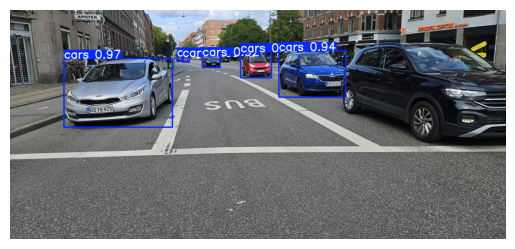

runs/detect/train3/5dQcl4y9_jpg.rf.40fb5c35fc42406950147d4194121d1e.jpg


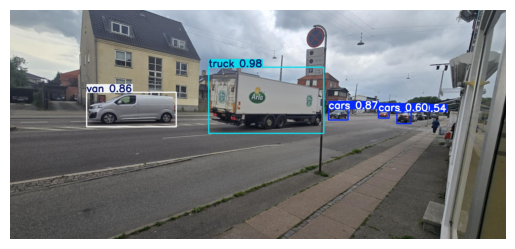

runs/detect/train3/WUaudNUW_jpeg.rf.1d28043872c1a06e454f9178b2523737.jpg


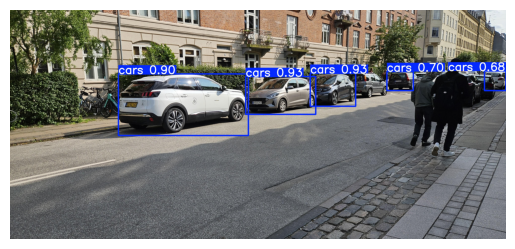

runs/detect/train3/9_jpg.rf.6523f9f6f9413079b8ce1285f6476bdf.jpg


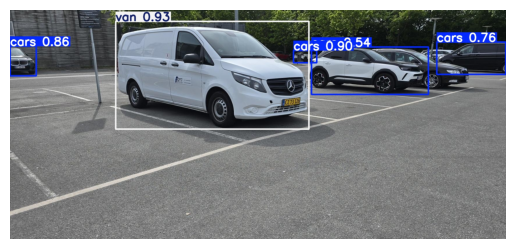

runs/detect/train3/extra2_jpg.rf.46adb9918808f59ff3e24d2b708fd045.jpg


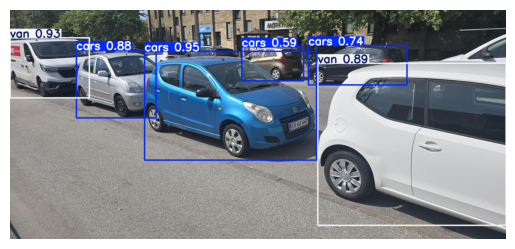

runs/detect/train3/19_jpg.rf.0882361917b3d023a2ca7cc0fd0e5e6f.jpg


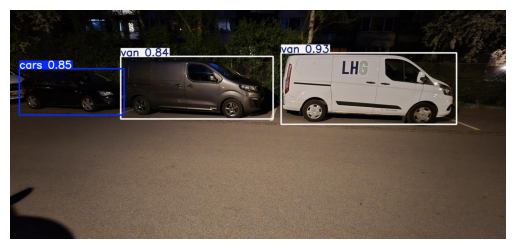

runs/detect/train3/9QzuSbsh_jpg.rf.f507e818d29168a78f31290c93d9b32d.jpg


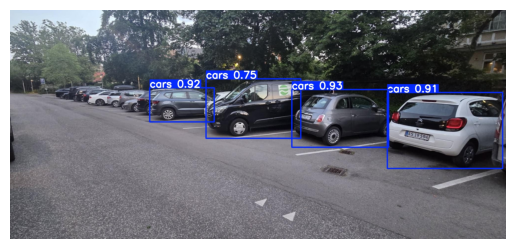

runs/detect/train3/vans1_jpg.rf.c898f97d29c40965fdde3905314703a5.jpg


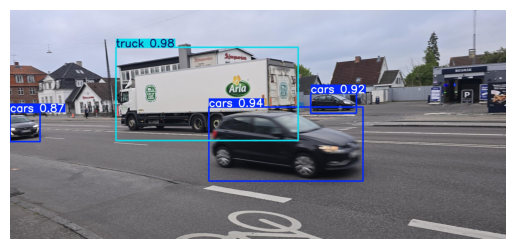

runs/detect/train3/lWGBnQ8J_jpeg.rf.ae2d90203176bdfe704a2bfcd909e78e.jpg


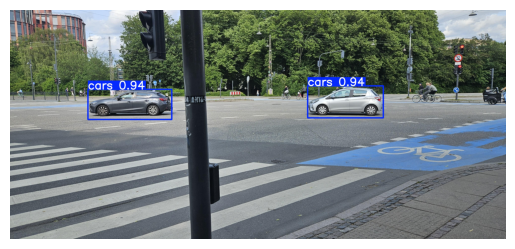

runs/detect/train3/DagsBillede-11_jpg.rf.cf1691e828c3240c4350d725c3d25ab2.jpg


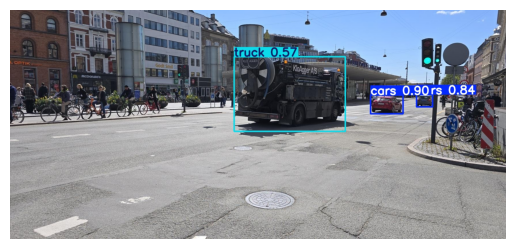

runs/detect/train3/4460d421-79b7-4b65-b661-f2c5bbf984e4_jpg.rf.57713680db67c6ad8596b5b112c1e928.jpg


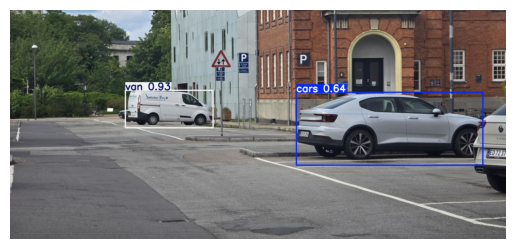

runs/detect/train3/extra39_jpg.rf.59d3a25d6d2a719381a0c2583aca73aa.jpg


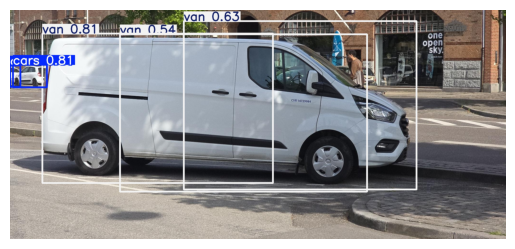

runs/detect/train3/vans7_jpg.rf.e2f77a18dc731bcbd13161bce2a3270b.jpg


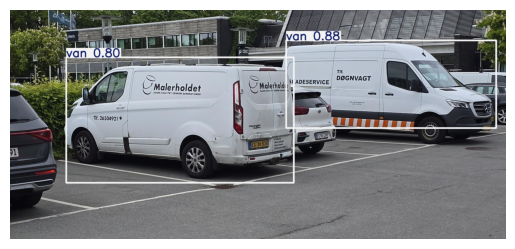

runs/detect/train3/mu1ErZHw_jpeg.rf.636828c06f3a3395d3b917c253e9ed0d.jpg


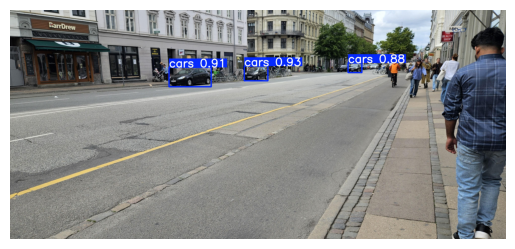

runs/detect/train3/extra12_jpg.rf.0b8a4f4813a90e3ab9daf2c844ff5022.jpg


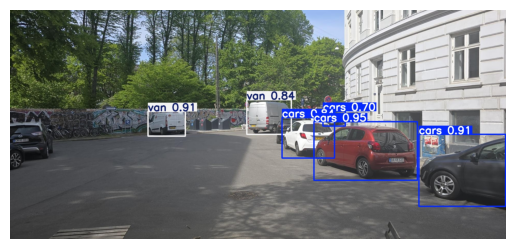

runs/detect/train3/gFHXaXOP_jpg.rf.922779a53491a30ba2c01082427ce4d3.jpg


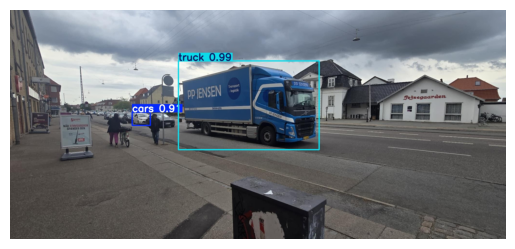

runs/detect/train3/extra47_jpg.rf.55e1032a02b2068281bc39fcd3d5b0e0.jpg


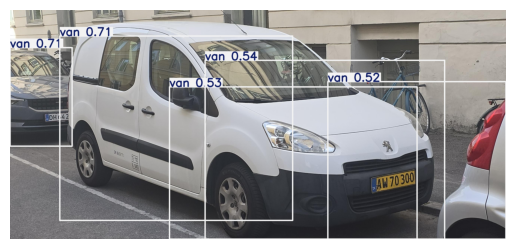

runs/detect/train3/651c94fc-1562-401c-b0d8-2b356add1078_jpg.rf.7b49083dca7943d78d015db29b25957e.jpg


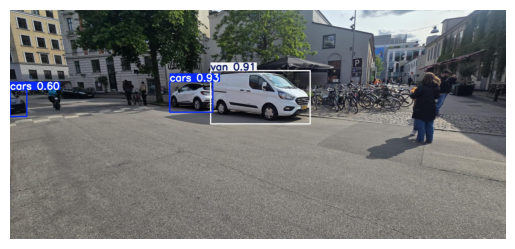

runs/detect/train3/20250505_132056_jpg.rf.84e3d31dc029bfcee8c050feac13995f.jpg


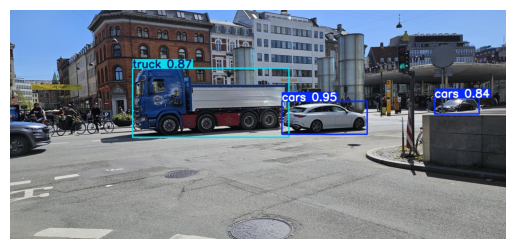

runs/detect/train3/extra25_jpg.rf.c728ddcd0f290aae8ef8cbdc3f7d0454.jpg


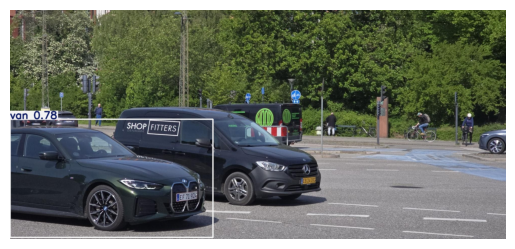

runs/detect/train3/bdf39ec2-c643-4465-b17b-c117cd549ead_jpg.rf.7b86f28433e0715500a05c606d38e265.jpg


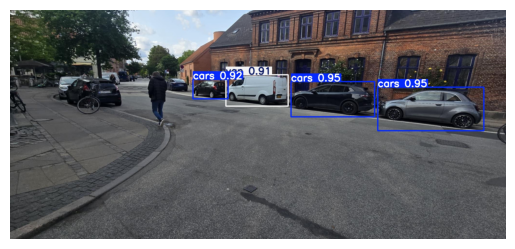

runs/detect/train3/DagsBillede-16_jpg.rf.381399e075792ea9a6d1c861dd61fd91.jpg


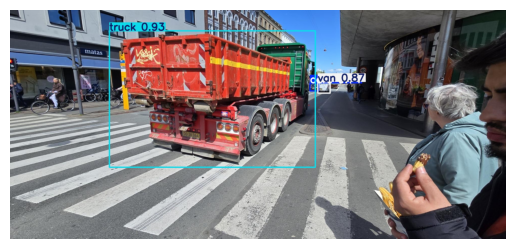

runs/detect/train3/16_jpg.rf.1a80224e0b64abc51cc7e9ed9c37da45.jpg


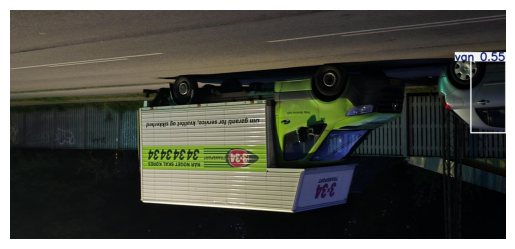

runs/detect/train3/2_jpg.rf.3fb4e66945892e9a73085c4f38b20851.jpg


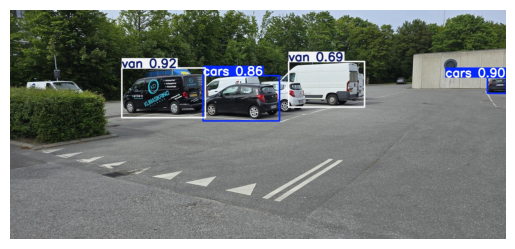

runs/detect/train3/extra36_jpg.rf.61364a8e549299420fb1b29884a8dc62.jpg


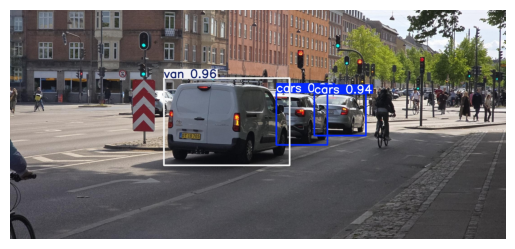

runs/detect/train3/abdde8d0-5487-4d70-aed0-aa90dd242ba4_jpg.rf.352d129fffc271b6534c1040b8636b3e.jpg


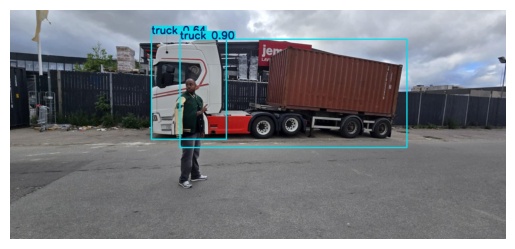

runs/detect/train3/LbFzNvse_jpeg.rf.e5f794cf8551118b915050efdd298971.jpg


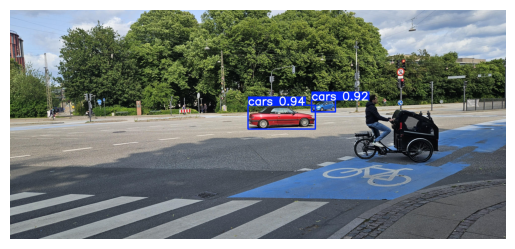

runs/detect/train3/20250505_125100_jpg.rf.6b0156956229e2951c7b17128b9eab47.jpg


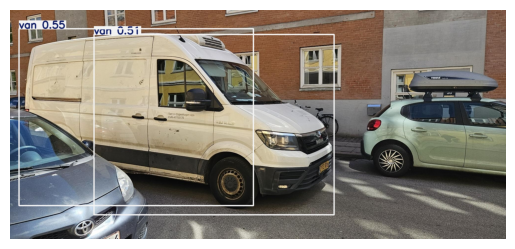

In [8]:
import glob
import cv2
import matplotlib.pyplot as plt
# Find all images
image_folder = "runs/detect/train3"
image_paths = glob.glob(f"{image_folder}/*")

# Loop through images and show them
for image_path in image_paths:
    image = cv2.imread(image_path)

    # Convert BGR (OpenCV default) to RGB (for matplotlib)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_path)
    # Show the image
    plt.imshow(image)
    plt.axis('off')  # Hide axis for cleaner display
    plt.show()